In [1]:
!pip uninstall tensorflow


Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [2]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.0 kB/s 
     |████████████████████████████████| 1.6 MB 44.3 MB/s 
     |████████████████████████████████| 5.8 MB 28.0 MB/s 
     |████████████████████████████████| 438 kB 42.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [3]:
!pip install ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [7]:
observations = 1000

xs = np.random.uniform(low = -10 , high =10 , size=(observations,1))
zs = np.random.uniform(low = -10 , high =10 , size=(observations,1))

generated_inputs = np.column_stack((xs , zs))

noise = np.random.uniform(-1 , 1 , (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro' , inputs = generated_inputs , targets = generated_targets) #tensorflow frndly file

## Loading the data from the file

In [8]:
training_data = np.load('TF_intro.npz')

In [14]:
training_data

In [9]:
input_size = 2 
output_size = 1

## Building the model

In [11]:
model = tf.keras.Sequential ([
                              tf.keras.layers.Dense(output_size)
                            ])

##Objective function and optimization

In [12]:
model.compile(optimizer='sgd' , loss = 'mean_squared_error') #using l2 norm loss

## Fit the model to the data

In [20]:
model.fit(training_data['inputs'] , training_data['targets'] , epochs = 100 , verbose = 2)

Epoch 1/100
32/32 - 0s - loss: 0.3518 - 47ms/epoch - 1ms/step
Epoch 2/100
32/32 - 0s - loss: 0.3541 - 46ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 0.3450 - 48ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 0.3431 - 47ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3476 - 50ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3487 - 47ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3491 - 46ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3460 - 52ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3488 - 49ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3468 - 47ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3613 - 55ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3490 - 56ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3539 - 48ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3527 - 46ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3502 - 47ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3553 - 56ms/epoch - 2ms/step
E

## Extract the weights and biases

In [21]:
model.layers[0].get_weights()

[array([[ 2.0157943],
        [-3.0516183]], dtype=float32), array([5.0023627], dtype=float32)]

In [23]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0157943],
       [-3.0516183]], dtype=float32)

In [24]:
biases = model.layers[0].get_weights()[1]
biases

array([5.0023627], dtype=float32)

##Extract the outputs (make predictions)

In [27]:
model.predict_on_batch(training_data['inputs']).round(1) #these values are compared to the targets to evaluate loss function

array([[ -5.2],
       [-42.2],
       [  6.2],
       [ 33.6],
       [ 31. ],
       [-14.2],
       [  2.9],
       [ -2. ],
       [-24.5],
       [-12.3],
       [ 36.1],
       [  8.3],
       [ 14.5],
       [ 21.5],
       [ 25. ],
       [  7.6],
       [-30.1],
       [-21. ],
       [-22.5],
       [-20.3],
       [-28.2],
       [ -6.2],
       [ 39.7],
       [ 30.7],
       [ 28.4],
       [ 24.5],
       [ 19.4],
       [ 13.7],
       [ 18.5],
       [-21.1],
       [ 15.9],
       [ 12.8],
       [ -7. ],
       [ 12.2],
       [ -3.2],
       [ 18.3],
       [-25.9],
       [ 14.3],
       [ 30.9],
       [ 20.4],
       [ 17.8],
       [  1.1],
       [ 17.1],
       [ 31.1],
       [ 30.5],
       [ 23.7],
       [-29.7],
       [  5.7],
       [  7. ],
       [ 33.9],
       [-16.5],
       [ 21.4],
       [ 10.1],
       [ -7.3],
       [-17.5],
       [ 23.5],
       [  9.3],
       [-11. ],
       [  9.4],
       [-18.2],
       [ 34.8],
       [ 28. ],
       [

In [28]:
training_data['targets'].round(1)

array([[ -4.3],
       [-41.9],
       [  5.6],
       [ 33.6],
       [ 31.1],
       [-13.3],
       [  3.7],
       [ -2.3],
       [-23.6],
       [-12. ],
       [ 35.2],
       [  7.4],
       [ 13.7],
       [ 21. ],
       [ 25.4],
       [  7.4],
       [-29.1],
       [-19.7],
       [-21.6],
       [-19.4],
       [-27.4],
       [ -6.3],
       [ 39.1],
       [ 30.3],
       [ 27.6],
       [ 24.8],
       [ 19. ],
       [ 13.6],
       [ 17.7],
       [-21.7],
       [ 15.1],
       [ 11.8],
       [ -7.4],
       [ 11.1],
       [ -3.4],
       [ 18.8],
       [-25.8],
       [ 13.3],
       [ 29.7],
       [ 20.1],
       [ 17.5],
       [  0.7],
       [ 17.3],
       [ 31.5],
       [ 31. ],
       [ 24.1],
       [-29.4],
       [  5.7],
       [  7.3],
       [ 33.8],
       [-16.9],
       [ 21.8],
       [  9.8],
       [ -6.5],
       [-18.2],
       [ 22.8],
       [  9.8],
       [-11.6],
       [  9.5],
       [-17. ],
       [ 34.9],
       [ 28.2],
       [

## Plotting the data

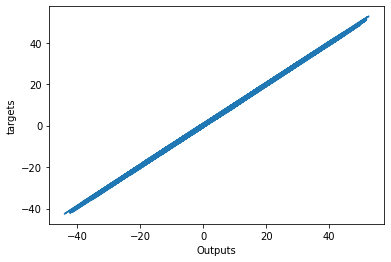

In [29]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])) , np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('targets')
plt.show()

The line should be as close to 45 degress as possible 